In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
from IPython.display import display
from sklearn.datasets import load_iris
iris_dataset = load_iris()
from sklearn import preprocessing
import numpy as np
import pandas as pd
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

df = pd.DataFrame(X_train)
display(df)

,0,1,2
0,1.0,-1.0,2.0
1,2.0,0.0,0.0
2,0.0,1.0,-1.0


In [14]:
df.std(axis=0)
df.var(axis=0)

0    1.000000
1    1.000000
2    1.527525
dtype: float64

0    1.000000
1    1.000000
2    2.333333
dtype: float64

In [15]:
1.527525 * 1.527525

2.333332625625

In [41]:
X_scaled = preprocessing.scale(df)
X_scaled
X_scaled.mean(axis=0)
X_scaled.std(axis=0)
X_scaled.var(axis=0)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

array([0., 0., 0.])

array([1., 1., 1.])

array([1., 1., 1.])

In [42]:

pd.DataFrame(X_scaled).describe()


,0,1,2
count,3.000000,3.000000,3.000000
mean,0.000000,0.000000,0.000000
std,1.224745,1.224745,1.224745
min,-1.224745,-1.224745,-1.069045
25%,-0.612372,-0.612372,-0.668153
50%,0.000000,0.000000,-0.267261
75%,0.612372,0.612372,0.534522
max,1.224745,1.224745,1.336306


In [29]:
df2.var(axis=0)
X_scaled

0    1.5
1    1.5
2    1.5
dtype: float64

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [32]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [35]:
pd.DataFrame(X_scaled).describe()

,0,1,2
count,3.000000,3.000000,3.000000
mean,0.000000,0.000000,0.000000
std,1.224745,1.224745,1.224745
min,-1.224745,-1.224745,-1.069045
25%,-0.612372,-0.612372,-0.668153
50%,0.000000,0.000000,-0.267261
75%,0.612372,0.612372,0.534522
max,1.224745,1.224745,1.336306


In [39]:
idata = iris_dataset.data
id_scaled = preprocessing.scale(idata)
idata.mean(axis=0)
id_scaled.mean(axis=0)
id_scaled.var(axis=0)
pd.DataFrame(id_scaled).describe()

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

array([1., 1., 1., 1.])

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Rule: As soon as you get the data, meaning before even inspecting it, split the data into train (80/70) and test(20/30) set. 
Why not do all the preprocessing on the whole data set, includig training and testing?


In [57]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() # This is a class

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])


scaler.fit(X_train) # calcuate what the mean and var of each column (fit) and subtract the mean and divide by var (transform)

X_train_scaled = scaler.transform(X_train)
X_train_scaled.mean(axis=0)
X_train_scaled

StandardScaler()

array([0., 0., 0.])

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [65]:
scaler.mean_
scaler.std_

array([1.        , 0.        , 0.33333333])

AttributeError: 'StandardScaler' object has no attribute 'std_'

In [68]:
import math
(X_train[0][0]-scaler.mean_[0])/math.sqrt(scaler.var_[0])
(X_train[1][0]-scaler.mean_[0])/math.sqrt(scaler.var_[0])
(X_train[2][0]-scaler.mean_[0])/math.sqrt(scaler.var_[0])


0.0

1.224744871391589

-1.224744871391589

In [69]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

In [72]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
min_max_scaler.transform(X_train)

X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

MinMaxScaler()

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

array([[-1.5       ,  0.        ,  1.66666667]])

In [73]:
from sklearn import preprocessing
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])

In [74]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [78]:
enc.transform([['female', 'from Asia', 'uses Chrome'],
                ['male', 'from Europe', 'uses Safari']]).toarray()

genders + locations + browsers

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 1.]])

['female',
 'male',
 'from Africa',
 'from Asia',
 'from Europe',
 'from US',
 'uses Chrome',
 'uses Firefox',
 'uses IE',
 'uses Safari']

In [85]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
orig_data = [
     [1, 2],
     [np.nan, 3], 
     [7, 6]
]

imp.fit(orig_data)  
imp.transform(orig_data)
imp.statistics_

SimpleImputer()

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

array([4.        , 3.66666667])

In [86]:
X = [[np.nan, 2], 
     [6, np.nan], 
     [7, 6]]
print(imp.transform(X))  

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), [0, 1, 0, 0, 1]
X
list(y)
# X -- feature/attributes
# y -- label/target value/

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

[0, 1, 0, 0, 1]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

y_train

X_test

y_test

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

[0, 1, 0, 0]

array([[8, 9]])

[1]

In [89]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

diabetes = datasets.load_diabetes()
diabetes.data.shape

feature_names = diabetes.feature_names
feature_names

(442, 10)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [90]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [91]:
df = pd.DataFrame(diabetes.data, columns=feature_names)
y = diabetes.target
df
y
df.shape

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

(442, 10)

In [92]:
import random
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

X_train

y_train

X_test

y_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
       178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
       166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
       104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
       208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
       317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
       107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
       175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
       215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
       225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
       142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
        48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
       279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
       246., 321., 308., 109.,  69., 182., 258., 16

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362
...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005670,-0.007073,-0.019476,0.041277,-0.039493,-0.003301,0.007207
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072133,0.011349
57,-0.027310,-0.044642,-0.063330,-0.050427,-0.089630,-0.104340,0.052322,-0.076395,-0.056153,-0.067351
391,-0.023677,-0.044642,-0.069797,-0.064199,-0.059359,-0.050478,0.019187,-0.039493,-0.089133,-0.050783


array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)
y_hat = reg.predict(X)
y_hat
y

LinearRegression()

1.0

array([ 6.,  8.,  9., 11.])

array([ 6,  8,  9, 11])

In [94]:
reg.coef_

reg.intercept_ 

# y = mx + b

reg.predict(np.array([[3, 5]]))

array([1., 2.])

3.0

array([16.])

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dataset=pd.read_csv('Salary_Data.csv')
dataset.head()
dataset.shape
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


(30, 2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [97]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X
y

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [109]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_train, y_train)
y_pred=regressor.predict(X_test)
y_pred
y_test
metrics.mean_absolute_error(y_test, y_pred)

LinearRegression()

0.9645401573418146

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

6286.453830757749

In [110]:
r2_score(y_test, y_pred)
regressor.coef_
regressor.intercept_

0.9024461774180497

array([9423.81532303])

25321.583011776813

Text(0.5, 1.0, 'Salary VS Experience (Training Data)')

Text(0.5, 0, 'Years of experiene')

Text(0, 0.5, 'Salary')

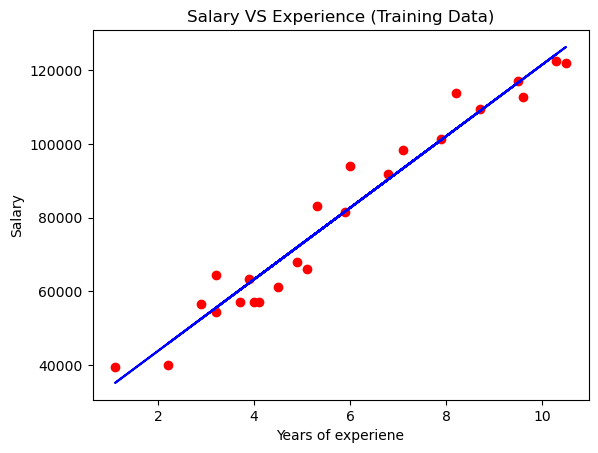

In [104]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary VS Experience (Training Data)')
plt.xlabel('Years of experiene')
plt.ylabel('Salary')
plt.show()

Text(0.5, 1.0, 'Salary VS Experience (Test Data)')

Text(0.5, 0, 'Years of experiene')

Text(0, 0.5, 'Salary')

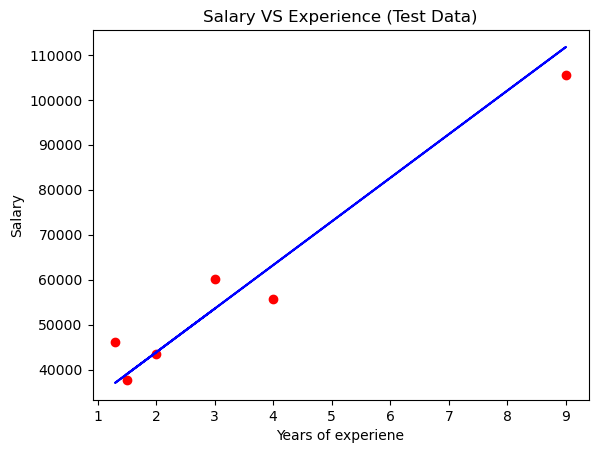

In [105]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.title('Salary VS Experience (Test Data)');
plt.xlabel('Years of experiene');
plt.ylabel('Salary');
plt.show()

In [112]:

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_pred
y_test
metrics.mean_absolute_error(y_test, y_pred)

DecisionTreeRegressor()

array([116969.,  66029., 101302.,  66029.,  54445.,  63218.])

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

8640.166666666666

<Figure size 500x400 with 0 Axes>

Text(0.5, 0, 'sepal length (cm)')

Text(0, 0.5, 'sepal width (cm)')

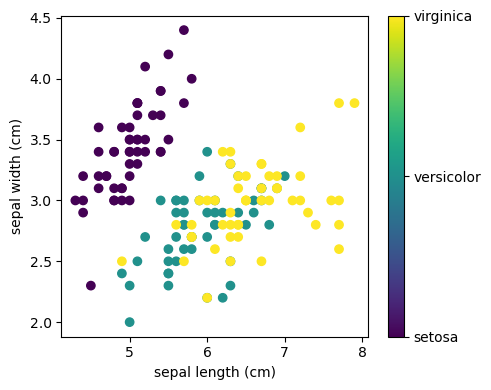

GaussianNB()

96.66666666666667

In [113]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

X = iris.data
Y = iris.target
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
100*metrics.accuracy_score(y_test, y_pred)

In [114]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()

In [ ]:
breast_cancer_benign = 95
breast_cancer_malignant = 5


95/100

In [115]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

LogisticRegression(random_state=0)

0.958041958041958

TP - True Positive -- Malignant, and you detected it as malignant
TN - True Negative -- Benign, and you detected it as Benign
FP - False Positive -- Benign, and you detected it as malignant
FN - False Negative -- Malignant, and you detected it as benign



In [118]:
cm = confusion_matrix(Y_test, Y_pred)
cm
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
#TN, FP, FN, TP
# 
tn, fp, fn, tp

array([[50,  3],
       [ 3, 87]], dtype=int64)

(50, 3, 3, 87)

In [119]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
95/5
95 - 0
5 - 1

TP - 0
TN - 95
FN - 5
FP - 0

tp / (tp+fn)
0 / (0+5) == 0

# recall measures what fraction of the positives our model identified

tp / (tp+fp)
0 / (0+0)

0 / 5
